<font color="red" size="7">Dimensionality Reduction</font>

<font color="red" size="5">3_Linear Discriminant Analysis (LDA)</font>

<b>Linear Discriminant Analysis (LDA)</b> is a supervised dimensionality reduction technique that works by finding the linear combinations of features that best separate two or more classes. Unlike PCA, which is unsupervised and aims to capture the most variance in the data, LDA aims to maximize the separability between different classes.

<font color="red" size=2>Key Concepts of LDA</font>
<ol>
<li><font color="yellow">Class-Specific Separation:</font>
        LDA seeks directions (linear combinations of features) that maximize the separation between classes. It does this by:
            Maximizing the between-class variance (variance between different classes).
            Minimizing the within-class variance (variance within the same class).</li>
    <li><font color="yellow">Assumptions:</font>
        The features are assumed to be normally distributed for each class.
        All classes share the same covariance matrix.</li>
    <li><font color="yellow">LDA vs PCA:</font>
        PCA focuses on maximizing the total variance in the data, irrespective of class labels.
        LDA, on the other hand, focuses on maximizing the separation between predefined classes.</li><ol>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import pandas as pd

In [6]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components for visualization
X_lda = lda.fit_transform(X_scaled, y)

In [8]:
# Create a DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
lda_df['target'] = y


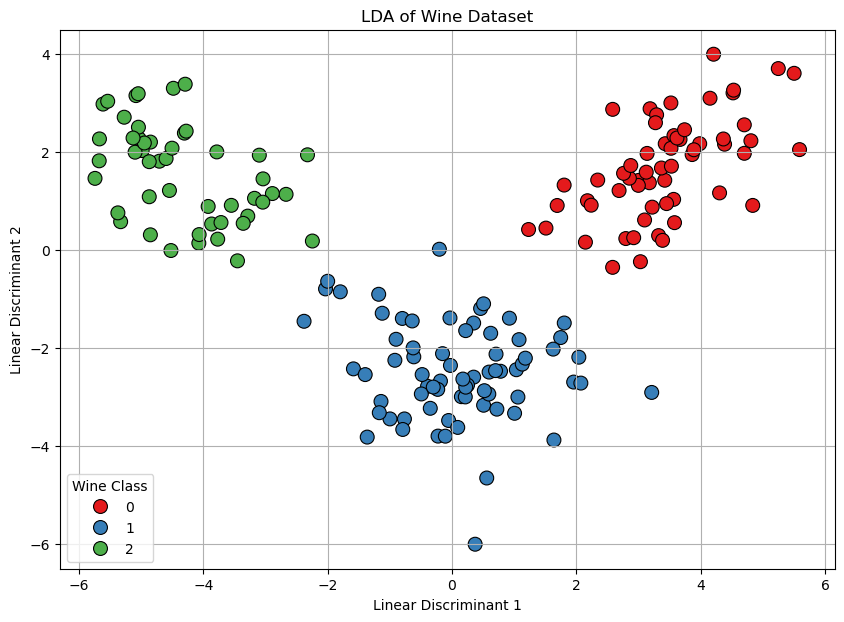

In [10]:
# Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='LD1', y='LD2', hue='target', palette='Set1', data=lda_df,
    s=100, edgecolor='k'
)
plt.title('LDA of Wine Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Wine Class')
plt.grid()
plt.show()

In [11]:
# Explained variance ratio
explained_variance = lda.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

Explained variance ratio: [0.68747889 0.31252111]


**Key Outputs**

<ol>
<font color = 'yellow'><li>Scatter Plot:</font> 
    The plot shows the wine samples projected onto the first two linear discriminants (LD1 and LD2). The colors represent different wine classes, and we expect the classes to be well-separated in this 2D space.</li>
<font color = 'yellow'><li>Explained Variance Ratio:</font>
    The explained variance ratio indicates how much of the class separability is captured by each discriminant. For example, the first linear discriminant may explain a large portion (e.g., 80%) of the separability, while the second discriminant captures the remaining variance.</li>
</ol>


**Interpretation**

<ol>

<font color = 'yellow'><li>Class Separation:</font> 
    The scatter plot should show distinct clusters corresponding to the three wine cultivars. If LDA is effective, the samples from different classes should be well-separated along the two linear discriminants (LD1 and LD2).</li>

<font color = 'yellow'><li>Explained Variance:</font>  The first linear discriminant (LD1) will likely explain most of the variance, as it captures the most significant axis of separation between the wine classes. The second linear discriminant (LD2) will capture the remaining separability.</li>

</ol>

**Advantages of LDA**
<ol>
<font color = 'yellow'><li>Supervised Approach:</font> 
    LDA uses the class labels to guide the dimensionality reduction, making it more effective at classifying and separating different classes than unsupervised methods like PCA.</li>

<font color = 'yellow'><li>Maximizing Class Separability:</font>  LDA focuses on finding directions that best separate the classes, which is particularly useful for classification tasks.</li></ol>


**Applications of LDA**

<ol>
<font color = 'yellow'><li>Pattern Recognition:</font>
        LDA is commonly used for pattern recognition tasks, such as face recognition, speech recognition, and medical diagnostics, where class separability is crucial.</li>
    
<font color = 'yellow'><li>Feature Extraction:</font> 
    In machine learning, LDA is often used as a feature extraction technique for classification tasks.</li>

<font color = 'yellow'><li>Dimensionality Reduction:</font>
    LDA can be used to reduce the number of features while preserving class separability, making downstream classification models more efficient.</li></ol>


**Limitations of LDA**

<ol>
<font color = 'yellow'><li>Assumption of Normality:</font> 
    LDA assumes that the data within each class is normally distributed. If this assumption is violated, LDA may not perform well.</li>
    
<font color = 'yellow'><li>Same Covariance Matrix:</font>  
    LDA assumes that all classes share the same covariance matrix. This might not hold true for datasets where the classes have different variances or correlations among features.</li>

<font color = 'yellow'><li>Linear Boundaries:</font> 
    LDA only finds linear boundaries between classes. If the classes are not linearly separable, LDA might not be as effective.</li></ol>